In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# 1. Data Preparation: Unzip and Rename
zip_file_path = r"C:\Users\AMLIT\Downloads\netflix_data.zip"  # Use raw string

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall() #extract all contents of zip
    
    extracted_filename = zip_ref.namelist()[0] #get the name of the extracted file
    
    new_filename = "Netflix_shows_movies.csv"
    os.rename(extracted_filename, new_filename)
    
    df = pd.read_csv(new_filename)
    print("Dataset successfully loaded.")
except FileNotFoundError:
    print(f"Error: Zip file '{zip_file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset successfully loaded.


In [11]:
# 2. Data Cleaning: Handling Missing Values
if 'df' in locals():  # check if df was loaded
    print("\nInitial Missing Values:")
    print(df.isnull().sum())

    # Handle missing values. For simplicity, we'll fill numerical with mean, categorical with mode
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0]) #avoid inplace
        else:
            df[column] = df[column].fillna(df[column].mean()) #avoid inplace

    print("\nMissing Values After Handling:")
    print(df.isnull().sum())


Initial Missing Values:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Missing Values After Handling:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [13]:
    # 3. Data Exploration: Description and Statistical Analysis
    print("\nData Description:")
    print(df.describe(include='all'))
    
    print("\nData Info:")
    print(df.info())
    
    # Example: Value counts of 'type'
    print("\nValue Counts of 'type':")
    print(df['type'].value_counts())
    
    # Example: Statistical analysis of 'release_year'
    print("\nStatistical Analysis of 'release_year':")
    print(df['release_year'].describe())


Data Description:
             show_id   type        title                director  \
count   6.234000e+03   6234         6234                    6234   
unique           NaN      2         6172                    3301   
top              NaN  Movie  The Silence  Raúl Campos, Jan Suter   
freq             NaN   4265            3                    1987   
mean    7.670368e+07    NaN          NaN                     NaN   
std     1.094296e+07    NaN          NaN                     NaN   
min     2.477470e+05    NaN          NaN                     NaN   
25%     8.003580e+07    NaN          NaN                     NaN   
50%     8.016337e+07    NaN          NaN                     NaN   
75%     8.024489e+07    NaN          NaN                     NaN   
max     8.123573e+07    NaN          NaN                     NaN   

                      cast        country       date_added  release_year  \
count                 6234           6234             6234    6234.00000   
unique      

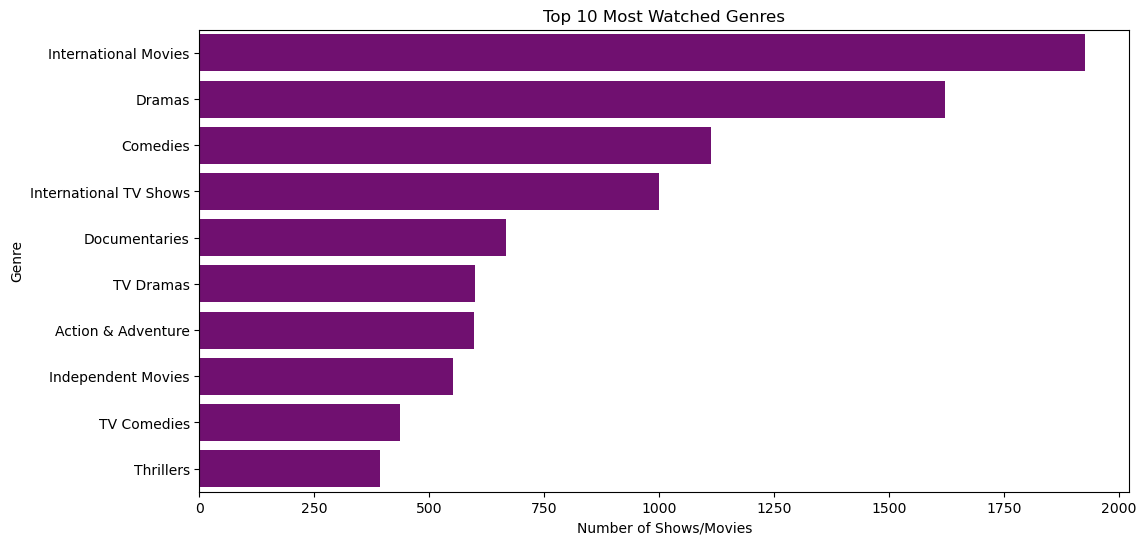

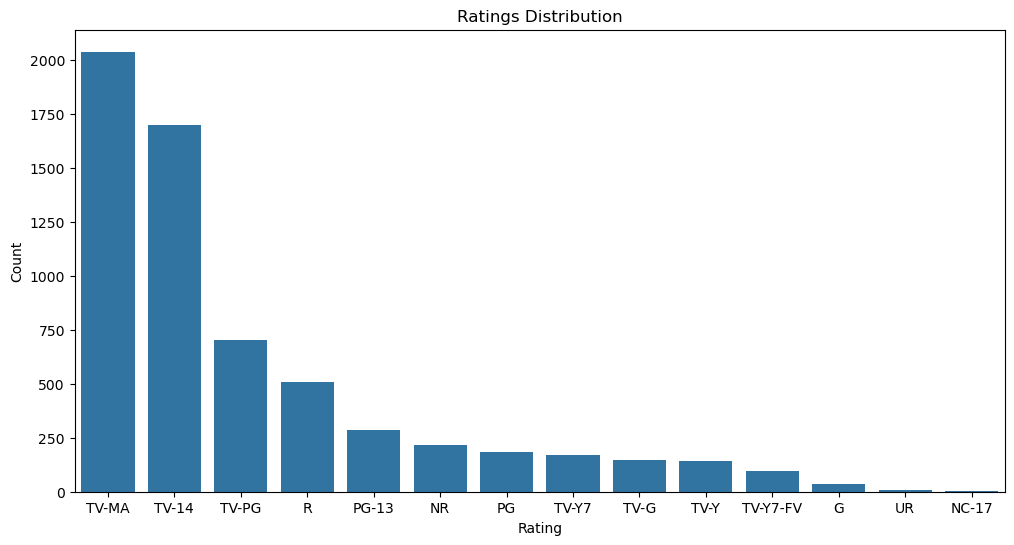

In [19]:
    # 4. Data Visualization:
    
    # Most watched genres (top 10)
    genres = df['listed_in'].str.split(', ', expand=True).stack()
    genre_counts = genres.value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, color ="purple")
    plt.title("Top 10 Most Watched Genres")
    plt.xlabel("Number of Shows/Movies")
    plt.ylabel("Genre")
    plt.show()
    
    # Ratings distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
    plt.title("Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()

In [ ]:
 # 5. R Integration (Ratings distribution using R):
    try:
        import rpy2.robjects as robjects
        from rpy2.robjects.packages import importr
        from rpy2.robjects import pandas2ri
        
        pandas2ri.activate()
        
        r = robjects.r
        base = importr('base')
        graphics = importr('graphics')
        
        r_df = pandas2ri.py2rpy(df)
        
        r.assign('r_df', r_df)
        r('png("ratings_distribution_r.png", width=800, height=600)')
        r('barplot(table(r_df$rating), main="Ratings Distribution (R)", xlab="Rating", ylab="Count")')
        r('dev.off()')
        
        print("\nRatings distribution chart created in R (ratings_distribution_r.png)")
        
    except ImportError:
        print("\nrpy2 not installed. R integration skipped.")
    except Exception as e:
        print(f"\nError occurred during R integration: {e}")